Task- 3: Prediction Using Decision Tree Algorithm

Dataset Link: https://bit.ly/3kXTdox

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


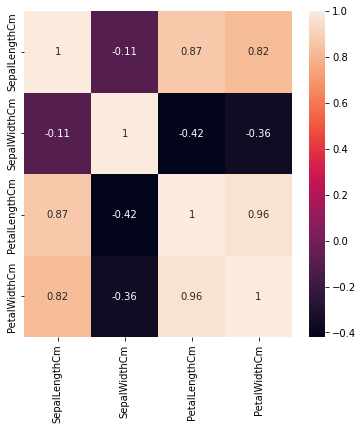

In [11]:
#correlation Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

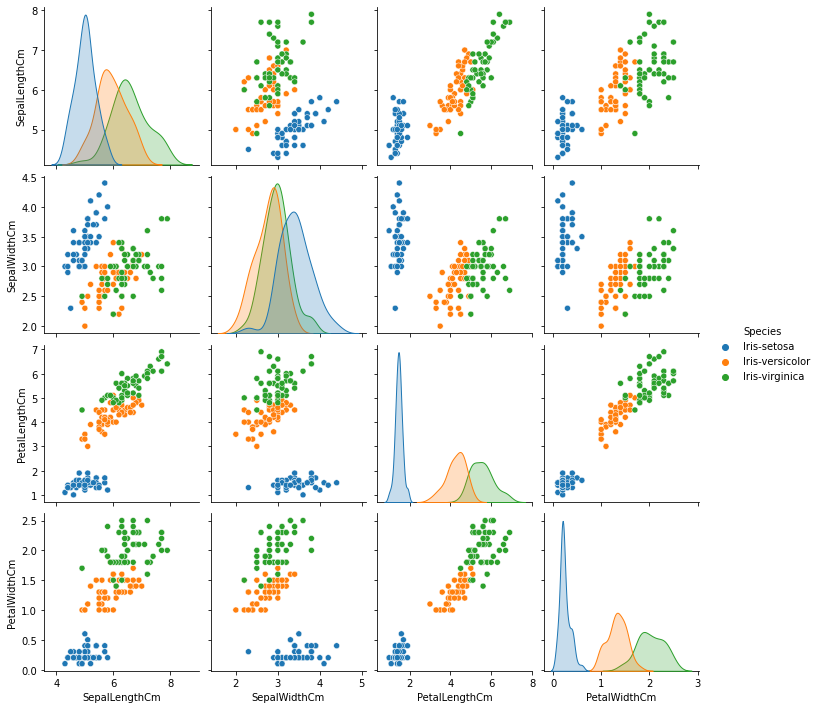

In [12]:
#data visualization
sns.pairplot(df, hue='Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

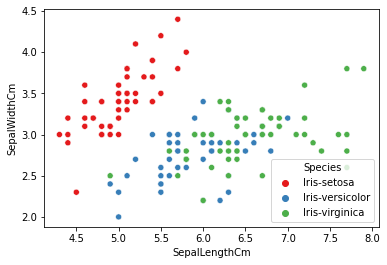

In [13]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species',data=df, palette = 'Set1')

Observation:

-Setosa has smaller sepal length but larger sepal width.

-Versicolor lies in the middle of the other two species in terms of sepal length and width.

-Virginica has larger sepal length but smaller sepal width.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

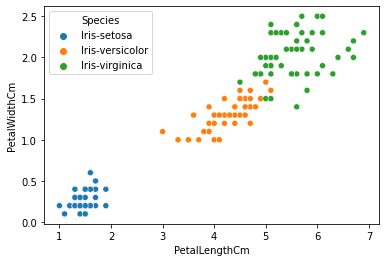

In [14]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)

Observation:

-Setosa has smaller petal lengths and width.

-Versicolor lies in the middle of the other two species in terms of petal length and width.

-Virginica has the largest of petal length and width.

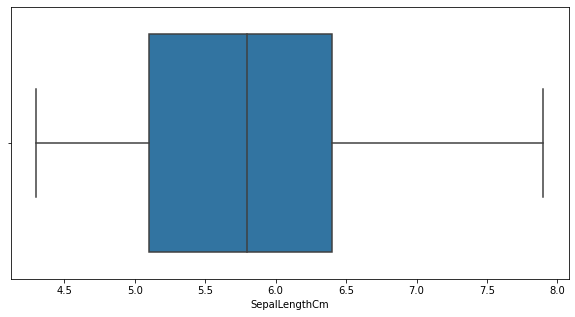

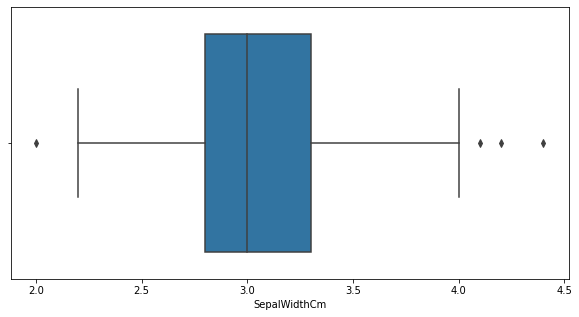

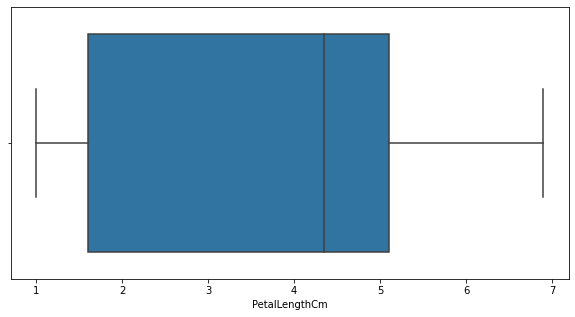

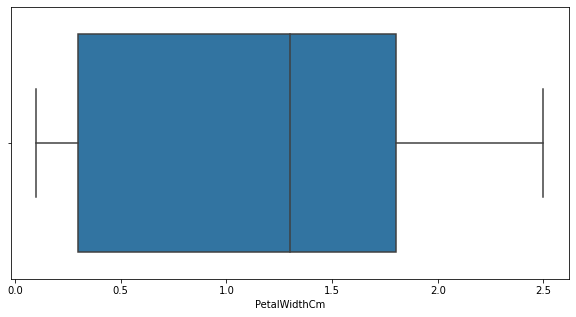

In [15]:
#for finding outliers use boxplot
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [22]:
for column in df.columns:
    q1=df['SepalWidthCm'].quantile(0.25)
    q3=df['SepalWidthCm'].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2) 
    upper_range=q3+(1.5*q2) 
    df['SepalWidthCm']=np.where(df['SepalWidthCm']<lower_range,lower_range,df['SepalWidthCm'])
    df['SepalWidthCm']=np.where(df['SepalWidthCm']>upper_range,upper_range,df['SepalWidthCm'])

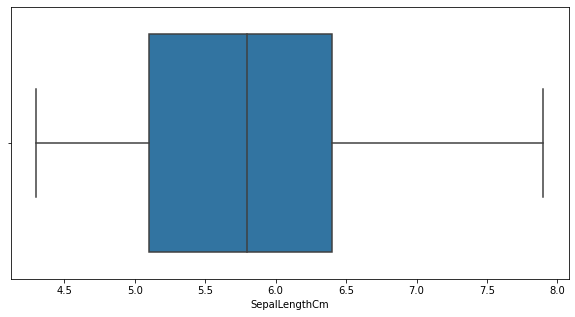

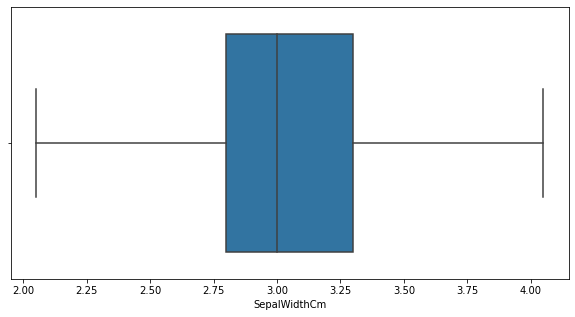

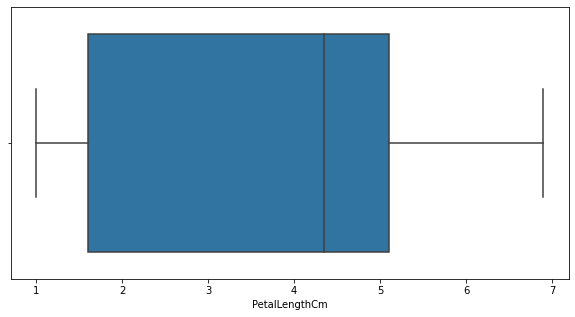

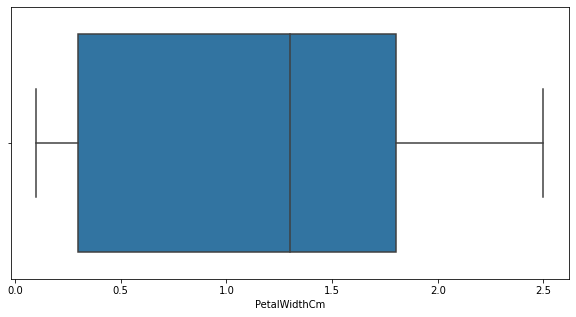

In [17]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [23]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
encoder_name_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
print(encoder_name_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [26]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [28]:
y= df['Species']
X= df.drop('Species', axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
X.shape

(150, 4)

In [30]:
y.shape

(150,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [51]:
X_train.shape

(120, 4)

In [52]:
y_train.shape

(120,)

In [53]:
#model Training and evaluation
from sklearn.tree import DecisionTreeClassifier
Model=DecisionTreeClassifier()
Model.fit(X_train,y_train)
Model.score(X_test,y_test)*100

96.66666666666667

In [55]:
y_pred=Model.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



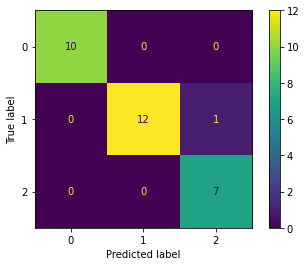

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
#plot confusion matrix
print(plot_confusion_matrix(Model,X_test,y_test))
print(classification_report(y_test,y_pred))

In [57]:
#prediction on random sample
prediction=Model.predict([[5.0,3.4,1.5,0.2]])
if prediction==0:
    print('The given sample is Iris-setosa')
elif prediction==1:
    print('The given sample is Iris-versicolor')
else:
    print('The given sample is Iris-virginica')

The given sample is Iris-setosa


Visualizing the decision tree

[Text(0.3076923076923077, 0.9285714285714286, 'petal width(cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]\nclass = virginica'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length(cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]\nclass = virginica'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width(cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width(cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'sepal width(cm) <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = virgini

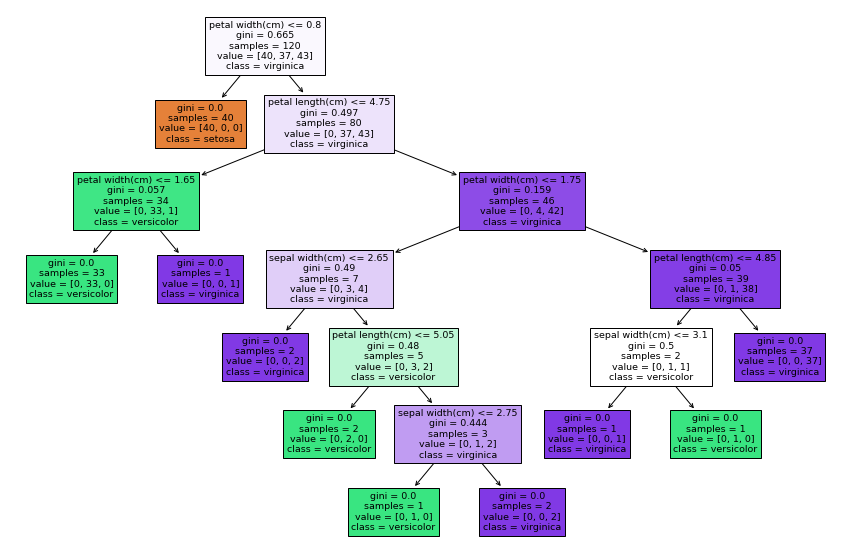

In [58]:
from sklearn import tree
features= ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
species=['setosa', 'versicolor', 'virginica']
figure=plt.figure(figsize=(15,10))
tree.plot_tree(Model, filled=True, feature_names=features, class_names=species)